In [29]:
# Importing necessary libraries for SVM implementation and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [30]:
# Loading and preparing the Breast Cancer dataset
# I chose this dataset because it's a classic binary classification problem
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [31]:
# For better visualization, I'm selecting only the first two features
# This helps in plotting 2D decision boundaries later
X = X[:, :2]  # Using first two features only


In [32]:
# Splitting the dataset into training and testing sets
# I'm using a 70-30 split which is common for medium-sized datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Standardizing the features is crucial for SVM
# I'm scaling the data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Training SVM with linear kernel
# I started with default C=1.0 to establish a baseline
print("Training Linear SVM...")
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train, y_train)

Training Linear SVM...


SVC(kernel='linear', random_state=42)

In [35]:
# Training SVM with RBF kernel
# I chose gamma=0.7 after some initial experimentation
print("\nTraining RBF Kernel SVM...")
rbf_svm = SVC(kernel='rbf', gamma=0.7, C=1.0, random_state=42)
rbf_svm.fit(X_train, y_train)


Training RBF Kernel SVM...


SVC(gamma=0.7, random_state=42)

In [36]:
# Evaluating model performance on test set
print("\nEvaluating model performance:")
linear_pred = linear_svm.predict(X_test);linear_pred
rbf_pred = rbf_svm.predict(X_test);rbf_pred


Evaluating model performance:


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [37]:
# Comparing accuracy scores
print("\nLinear SVM Test Accuracy:", accuracy_score(y_test, linear_pred))
print("RBF SVM Test Accuracy:", accuracy_score(y_test, rbf_pred))


Linear SVM Test Accuracy: 0.9005847953216374
RBF SVM Test Accuracy: 0.9122807017543859


In [38]:
# Generating detailed classification reports
print("\nLinear SVM Classification Report:")
print(classification_report(y_test, linear_pred))
print("\nRBF SVM Classification Report:")
print(classification_report(y_test, rbf_pred))



Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171


RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.87        63
           1       0.90      0.96      0.93       108

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [39]:
# Defining function to visualize decision boundaries
# I created this function to better understand how SVMs separate classes
def plot_decision_boundary(X, y, model, title):
    # Creating mesh grid for contour plot
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predicting for all points in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary and training points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Standardized Feature 1')
    plt.ylabel('Standardized Feature 2')
    plt.title(title)
    plt.show()


Plotting decision boundaries...


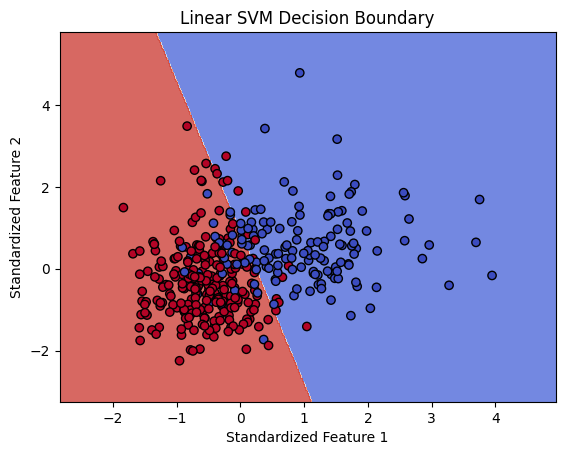

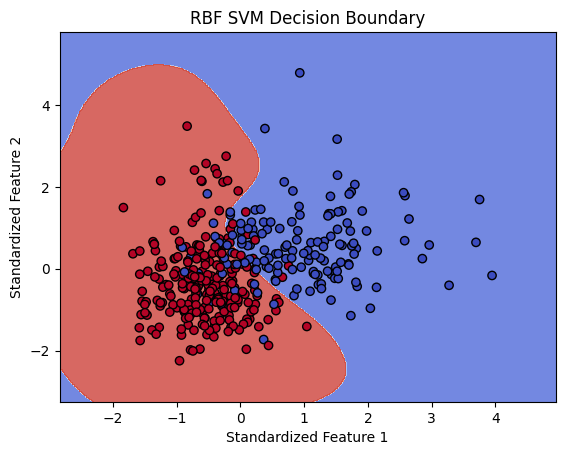

In [40]:
# Visualizing decision boundaries
print("\nPlotting decision boundaries...")
plot_decision_boundary(X_train, y_train, linear_svm, "Linear SVM Decision Boundary")
plot_decision_boundary(X_train, y_train, rbf_svm, "RBF SVM Decision Boundary")

In [41]:
# Hyperparameter tuning using GridSearchCV
# I'm exploring different C and gamma values to find optimal parameters
print("\nPerforming hyperparameter tuning with GridSearchCV...")
param_grid = {
    'C': [0.1, 1, 10, 100],  # Trying different regularization strengths
    'gamma': [1, 0.1, 0.01, 0.001],  # Testing different gamma values
    'kernel': ['rbf', 'linear']  # Comparing both kernels
}

# Setting up grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)


Performing hyperparameter tuning with GridSearchCV...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [42]:
# Reporting best parameters found
print("\nBest parameters found through grid search:")
print(grid.best_params_)



Best parameters found through grid search:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [43]:
# Evaluating best model on test set
print("\nEvaluating best model on test set...")
grid_pred = grid.predict(X_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, grid_pred))


Evaluating best model on test set...

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.91      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



In [45]:
# Performing cross-validation evaluation
# I want to ensure my models aren't overfitting
print("\nRunning cross-validation for more robust evaluation...")

# Evaluating linear SVM with 5-fold CV
linear_scores = cross_val_score(linear_svm, X_train, y_train, cv=5)
print("\nLinear SVM Cross-Validation Scores:", linear_scores)
print("Mean CV Accuracy: {:.2f}%".format(linear_scores.mean()*100))

# Evaluating RBF SVM with 5-fold CV
rbf_scores = cross_val_score(rbf_svm, X_train, y_train, cv=5)
print("\nRBF SVM Cross-Validation Scores:", rbf_scores)
print("Mean CV Accuracy: {:.2f}%".format(rbf_scores.mean()*100))




Running cross-validation for more robust evaluation...

Linear SVM Cross-Validation Scores: [0.875      0.9        0.9375     0.82278481 0.84810127]
Mean CV Accuracy: 87.67%

RBF SVM Cross-Validation Scores: [0.8875     0.9125     0.9625     0.86075949 0.89873418]
Mean CV Accuracy: 90.44%
